In [1]:
data<-read.csv('~/data/analysis/core_behav/test_r_file.csv')

In [2]:
library(nlme)
library(lme4)
library(ggplot2)
library(lattice)

Loading required package: Matrix

Attaching package: ‘lme4’

The following object is masked from ‘package:nlme’:

    lmList



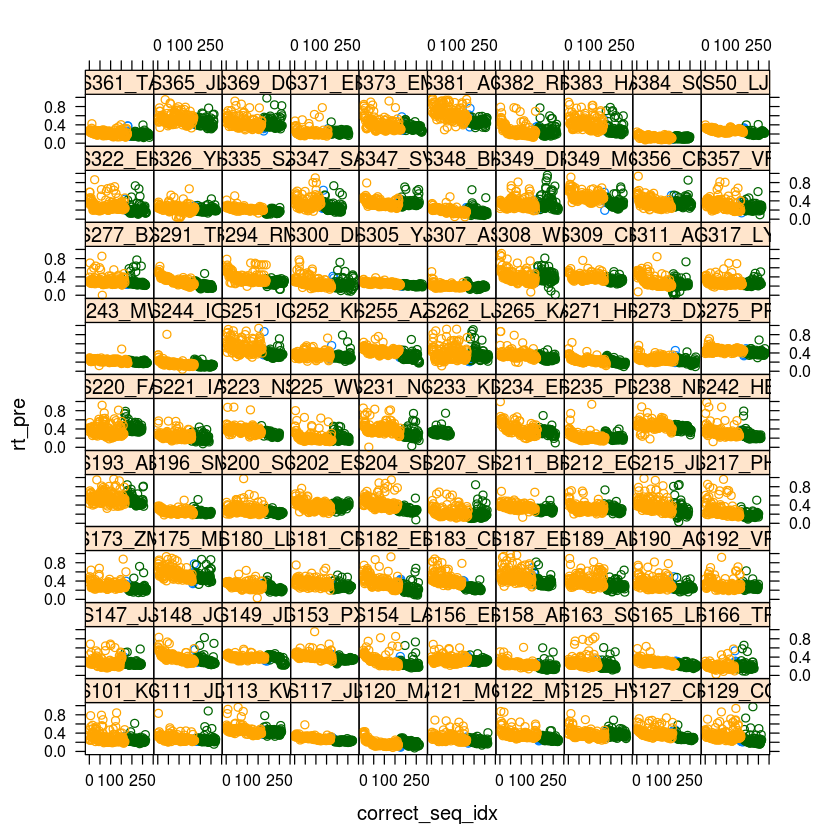

In [3]:
xyplot(rt_pre~correct_seq_idx|subject_id,
       group=~task,
       data=data[(data$transition=='14')&data$match&(data$sequence=='CoReTSeq')&(data$rt_pre<1),])

In [4]:
model1<-lme4::nlmer(
    rt_pre~SSasymp(correct_seq_idx/max(correct_seq_idx),Asym,xmid,scale)~ (Asym+xmid+scale | subject_id),
    start=c(Asym=.2,xmid=.5,scale=.1),
    data=data[(data$transition=='14')&data$match&(data$sequence=='CoReTSeq')&(data$group!='NoReactNoInt')&(data$group!='NoReactInt'),])

In [5]:
summary(model1)

Nonlinear mixed model fit by maximum likelihood  ['nlmerMod']
Formula: rt_pre ~ SSasymp(correct_seq_idx/max(correct_seq_idx), Asym,  
    xmid, scale) ~ (Asym + xmid + scale | subject_id)
   Data: data[(data$transition == "14") & data$match & (data$sequence ==  
    "CoReTSeq") & (data$group != "NoReactNoInt") & (data$group !=  
    "NoReactInt"), ]

     AIC      BIC   logLik deviance df.resid 
-24223.3 -24146.8  12121.7 -24243.3    15493 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9151 -0.4396 -0.1461  0.1753 30.8886 

Random effects:
 Groups     Name  Variance Std.Dev. Corr     
 subject_id Asym  0.009354 0.09672           
            xmid  0.019875 0.14098  0.48     
            scale 2.006986 1.41668  0.69 0.06
 Residual         0.011822 0.10873           
Number of obs: 15503, groups:  subject_id, 59

Fixed effects:
      Estimate Std. Error t value
Asym  0.222600   0.002056   108.3
xmid  0.454448   0.001483   306.5
scale 1.073668   0.001377   779.5

Correla

In [30]:
cons_func <- function(learn_asym, learn_start, learn_rate, sleep_gain, task, seq_id) learn_asym+(learn_start-learn_asym)*exp(-exp(learn_rate)*seq_id)+sleep_gain*(task=='Reactivation-TSeq-D-Two') 
cons_model<-rt_pre~cons_func(learn_asym, learn_start, learn_rate, sleep_gain, task, correct_seq_idx)

In [44]:
test1<-nlme::nlme(
    model=cons_model,
    fixed=learn_asym+learn_start+learn_rate+sleep_gain~1,
    random=list(
        learn_asym~subject_id,
        learn_start~subject_id,
        learn_rate~subject_id),
    start=c(learn_asym=.2,learn_start=.5,learn_rate=1,sleep_gain=0),
    data=data[(data$transition=='14')&data$match&(data$sequence=='CoReTSeq')&(data$group!='NoReactNoInt')&(data$group!='NoReactInt'),],
    group=~subject_id)

ERROR: Error in MEEM(object, conLin, control$niterEM): Singularity in backsolve at level 0, block 1


In [28]:
str(data)

'data.frame':	203863 obs. of  15 variables:
 $ block_id       : int  0 0 0 0 0 0 0 0 0 0 ...
 $ seq_id         : int  0 0 0 0 0 1 1 1 1 1 ...
 $ correct_seq_idx: int  1 1 1 1 1 2 2 2 2 2 ...
 $ nkey           : int  1 2 3 4 5 6 7 8 9 10 ...
 $ time           : num  25.7 26.1 26.6 27.2 27.6 ...
 $ rt_pre         : num  Inf 0.449 0.521 0.583 0.363 ...
 $ rt_post        : num  0.449 0.521 0.583 0.363 0.889 ...
 $ sequence       : Factor w/ 2 levels "CoReIntSeq","CoReTSeq": 2 2 2 2 2 2 2 2 2 2 ...
 $ keypress       : int  1 4 2 3 1 1 4 2 3 1 ...
 $ transition     : int  1 14 42 23 31 11 14 42 23 31 ...
 $ match          : logi  TRUE TRUE TRUE TRUE TRUE TRUE ...
 $ group          : Factor w/ 5 levels "NoReactInt","NoReactNoInt",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ subject_id     : Factor w/ 90 levels "S101_KC","S111_JD",..: 30 30 30 30 30 30 30 30 30 30 ...
 $ subject        : Factor w/ 90 levels "NoReactInt_CoRe_S192_VR",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ task           : Factor w/ 5 levels "Reactiv